In [ ]:
###50. What is a Category data type

In [7]:
import pandas as pd

In [8]:
movies = pd.read_csv('P4-Movie-Ratings.csv')

In [9]:
len(movies)

559

In [10]:
movies.head()

,Film,Genre,Rotten Tomatoes Ratings %,Audience Ratings %,Budget (million $),Year of release
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [11]:
movies.columns = ['Film','Genre','CriticRating','AudienceRating','BudgetMillions','Year']

In [12]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
BudgetMillions    559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [13]:
movies.describe()

,CriticRating,AudienceRating,BudgetMillions,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [14]:
movies.Film = movies.Film.astype('category')
movies.Genre = movies.Genre.astype('category')
movies.Year = movies.Year.astype('category')

In [15]:
movies.Genre.unique()

[Comedy, Adventure, Action, Horror, Drama, Romance, Thriller]
Categories (7, object): [Comedy, Adventure, Action, Horror, Drama, Romance, Thriller]

In [16]:
movies.Genre.cat.categories

Index(['Action', 'Adventure', 'Comedy', 'Drama', 'Horror', 'Romance',
       'Thriller'],
      dtype='object')

In [17]:
#No Year
movies.describe() 

,CriticRating,AudienceRating,BudgetMillions
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [1]:
###51. Working with JointPlots

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [6]:
#Jointplots

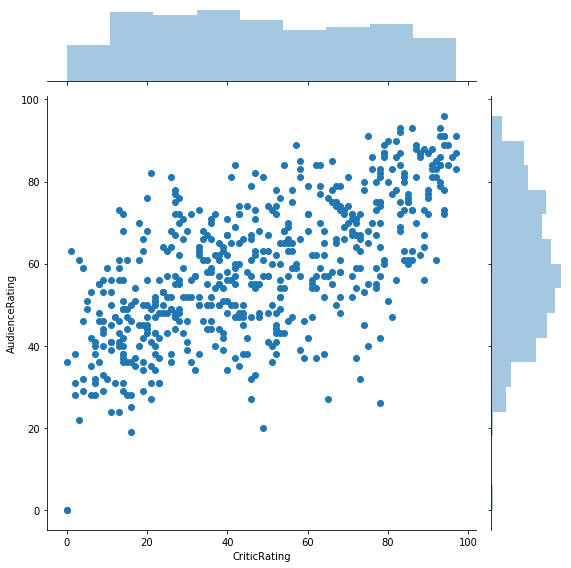

In [19]:
j = sns.jointplot(data=movies, x="CriticRating", y="AudienceRating", size=8)

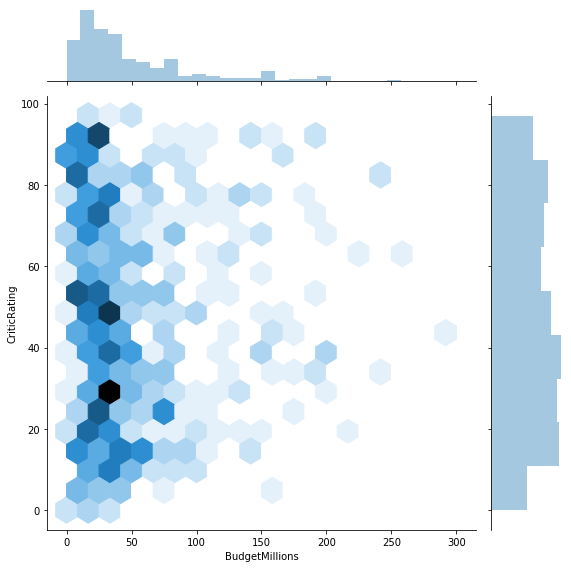

In [24]:
j = sns.jointplot(data=movies, y="CriticRating", x="BudgetMillions", size=8,  kind='hex')

In [ ]:
#<<< Chart 1

In [25]:
###52. Histograms

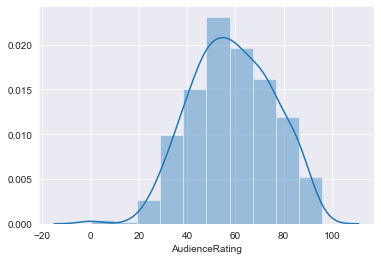

In [36]:
#already know this method:
m1 = sns.distplot(movies.AudienceRating, bins=10)

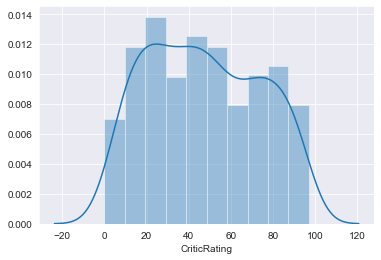

In [37]:
m2 = sns.distplot(movies.CriticRating, bins=10)

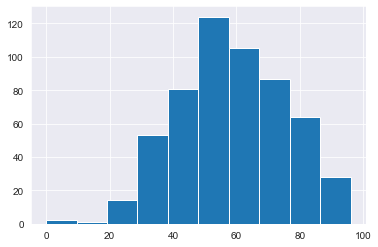

In [35]:
sns.set_style("darkgrid")
n1 = plt.hist(movies.AudienceRating, bins=10)

In [ ]:
#<<< Chart 2

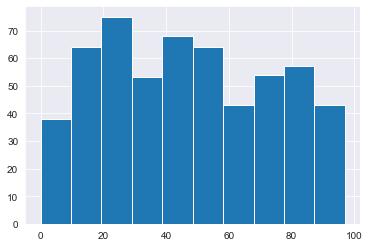

In [38]:
n2 = plt.hist(movies.CriticRating, bins=10)

In [39]:
#<<< Chart 3

In [40]:
###53. Stacked histograms in Python

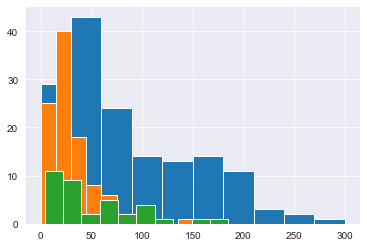

In [47]:
plt.hist(movies[movies.Genre == 'Action'].BudgetMillions, bins=10)
plt.hist(movies[movies.Genre == 'Drama'].BudgetMillions, bins=10)
plt.hist(movies[movies.Genre == 'Thriller'].BudgetMillions, bins=10)
plt.show()

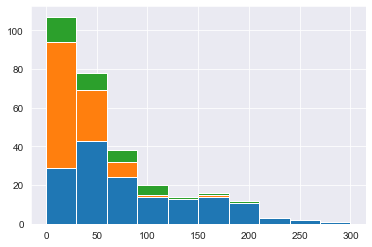

In [52]:
plt.hist([movies[movies.Genre == 'Action'].BudgetMillions, movies[movies.Genre == 'Drama'].BudgetMillions, movies[movies.Genre == 'Thriller'].BudgetMillions], bins=10, stacked=True, )
plt.show()

In [65]:
movie_genres = movies.Genre.cat.categories

In [78]:
movie_budget_per_genre = []
mylabels = []

for i in movie_genres:
    movie_budget_per_genre.append(movies[movies.Genre == i].BudgetMillions)
    mylabels.append(i)

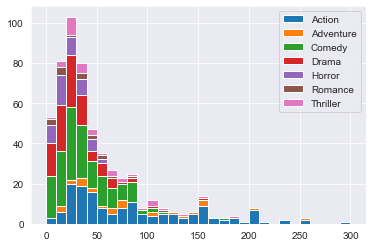

In [81]:
h = plt.hist(movie_budget_per_genre, bins=30, stacked=True, label=mylabels)
plt.legend()
plt.show()

In [82]:
#<<< Chart 4

In [83]:
###54. Creating a KDE Plot

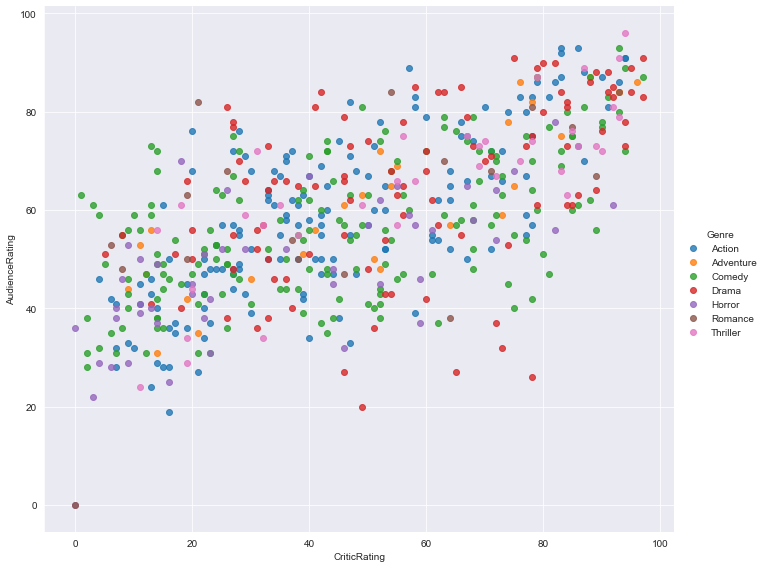

In [90]:
vis1 = sns.lmplot(data=movies, x='CriticRating', y='AudienceRating', fit_reg=False, hue='Genre', size=8, aspect=1.2)

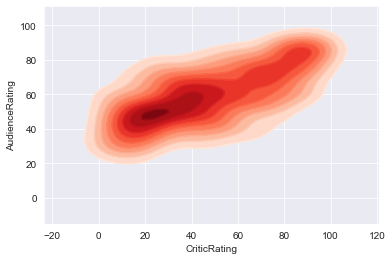

In [98]:
k1 = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Reds')
#TIP:
k1b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='Reds')

In [99]:
###55. Working with Subplots()

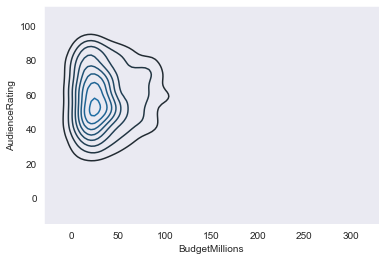

In [108]:
sns.set_style('dark')
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating)

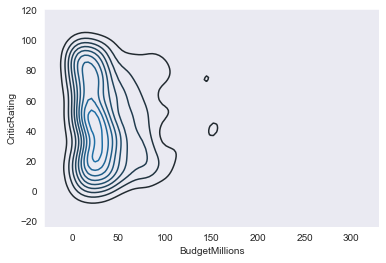

In [109]:
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating)

[(-20, 160)]

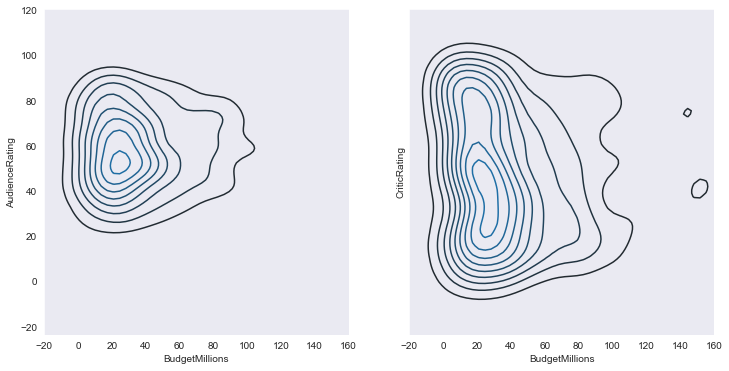

In [123]:
f, axes = plt.subplots(1, 2, figsize=(12,6), sharex=True, sharey=True)
k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0])
k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[1])
k1.set(xlim=(-20,160))

In [116]:
axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027104A8D278>,
      dtype=object)

In [124]:
###56. Violinplots vs Boxplots

In [125]:
#Violinplots

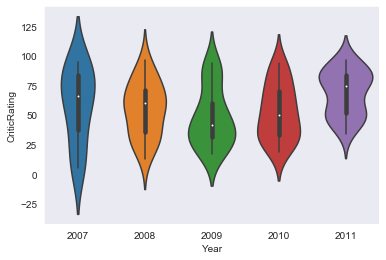

In [129]:
z = sns.violinplot(data=movies[movies.Genre == 'Drama'], x='Year', y='CriticRating')

In [127]:
#Boxplots

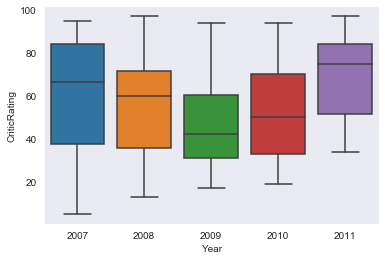

In [130]:
w = sns.boxplot(data=movies[movies.Genre == 'Drama'], x='Year', y='CriticRating')

In [ ]:
###57. Creating a Facet Grid

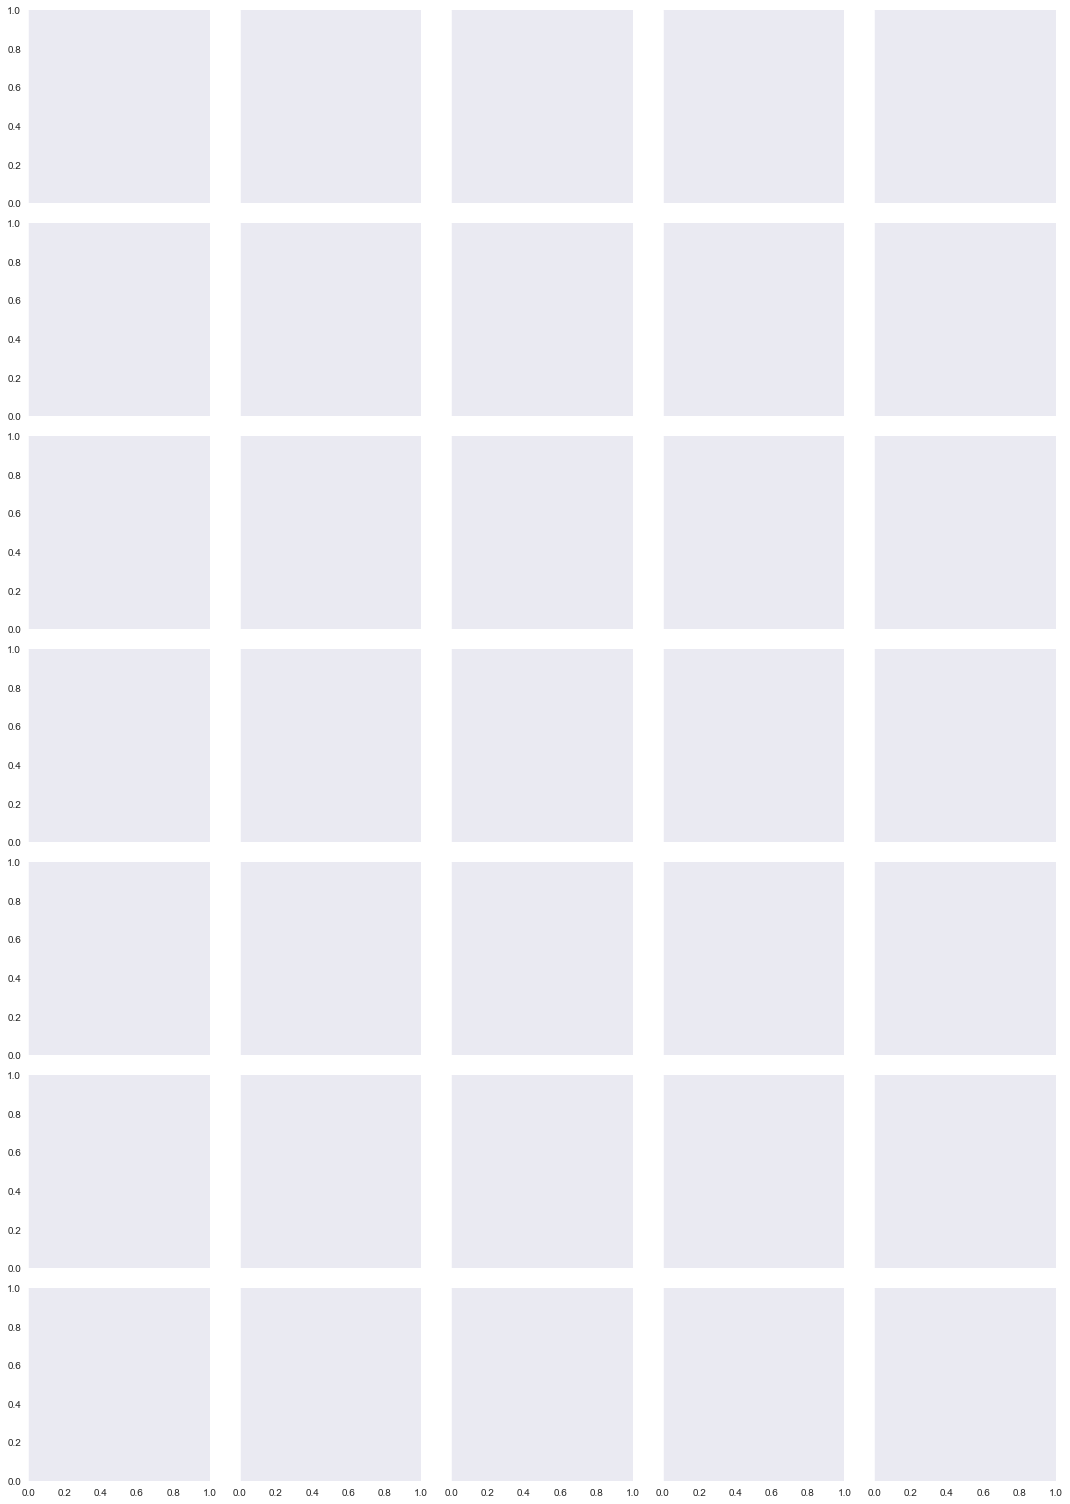

In [132]:
#g = sns.FacetGrid(movies, row='Genre', hue='Genre')
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')

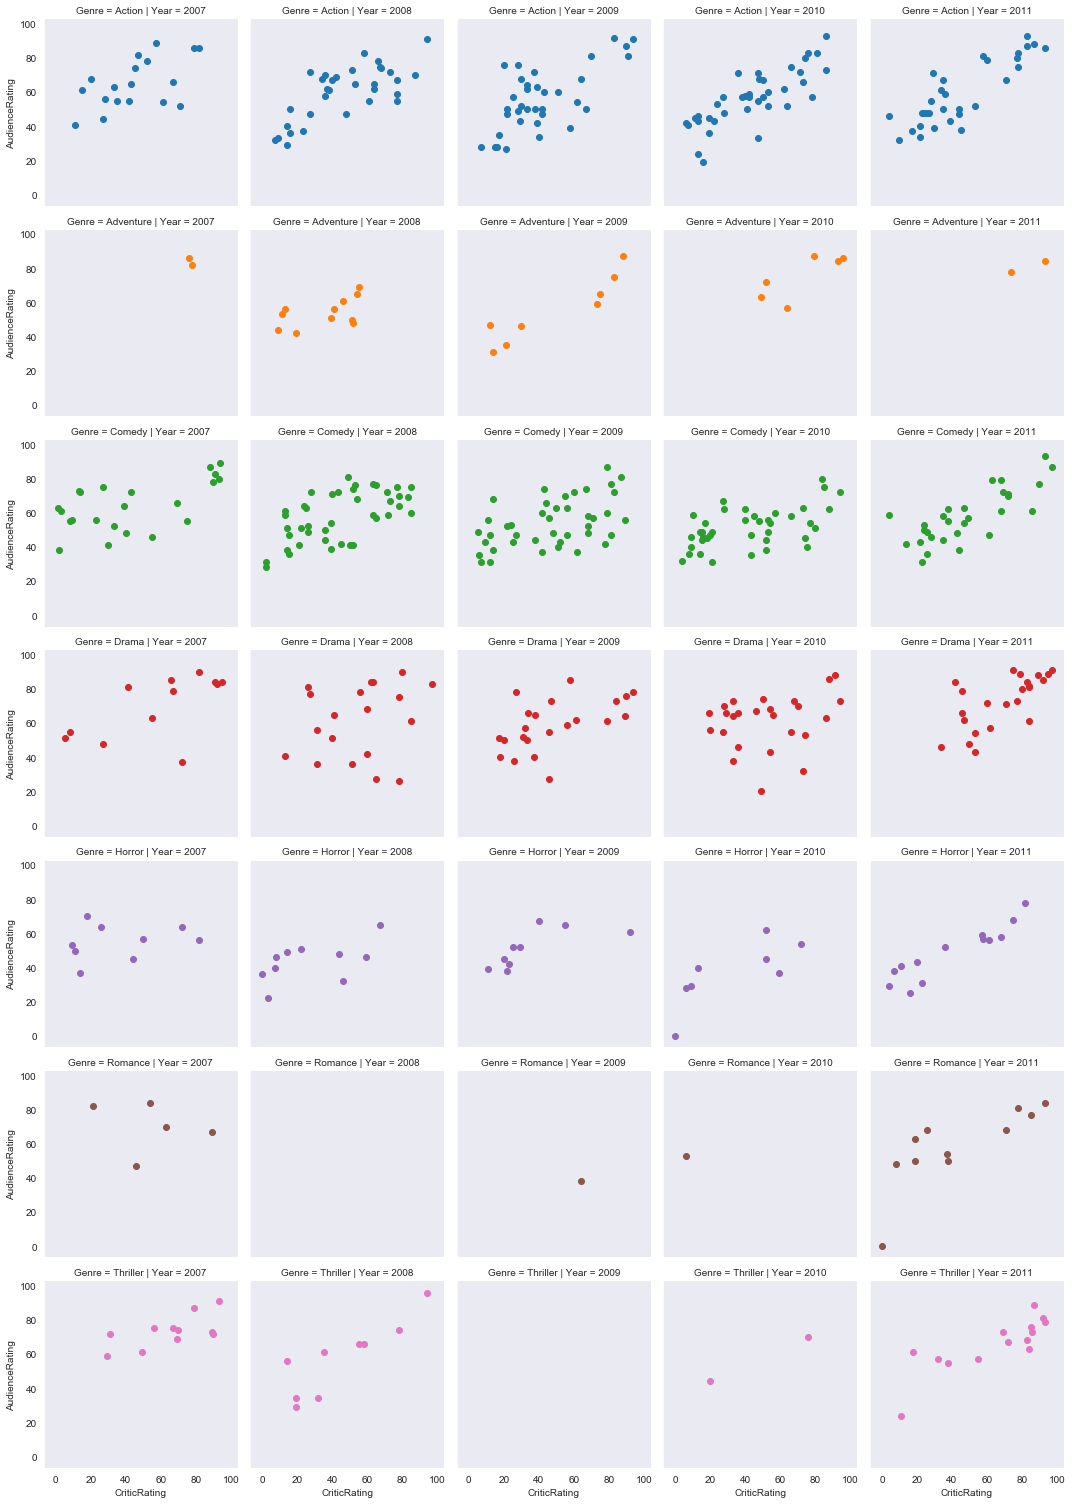

In [135]:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating')

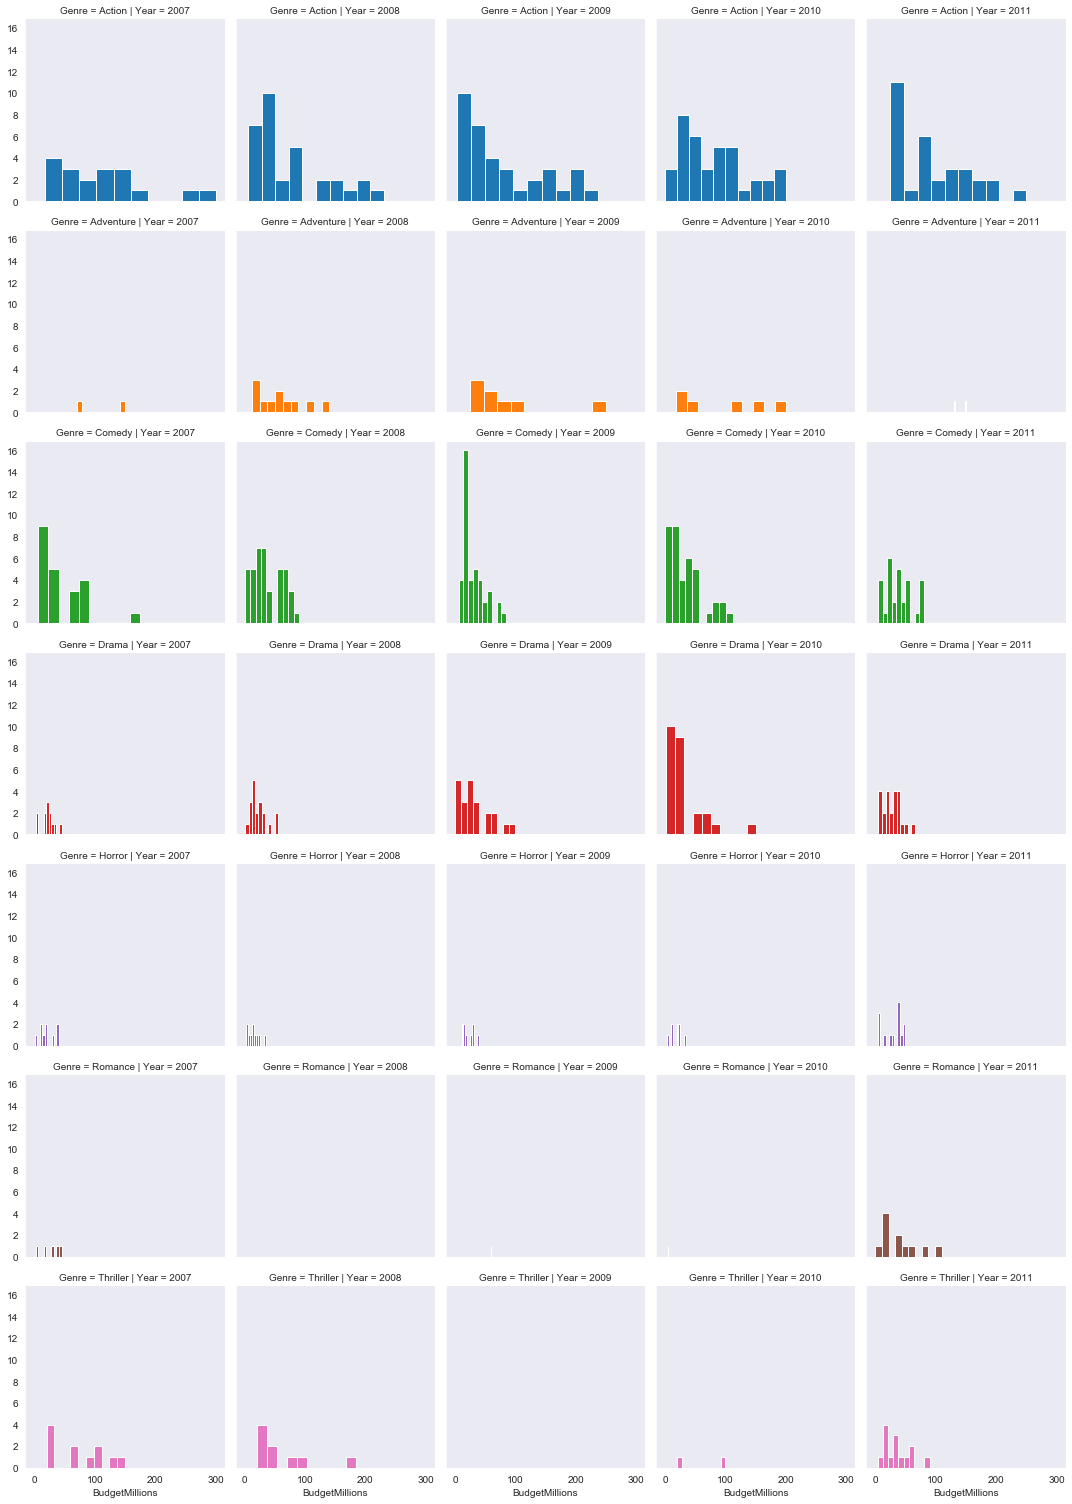

In [136]:
#can populate with any type of chart. Example: histograms
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
g = g.map(plt.hist, 'BudgetMillions')

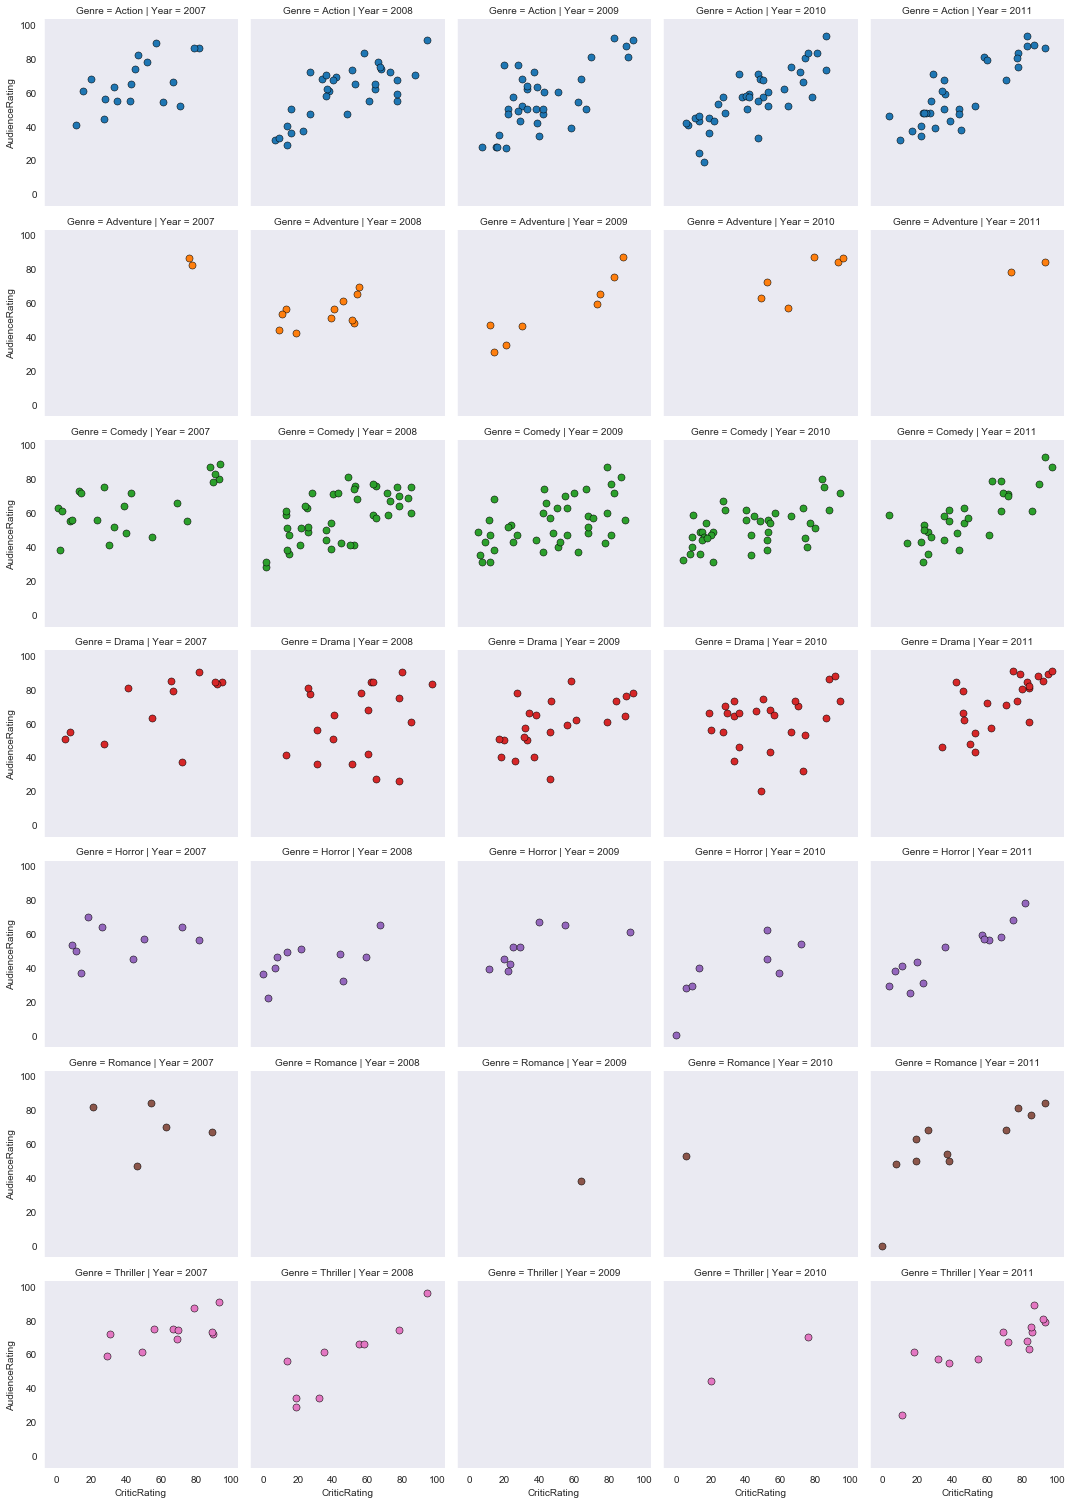

In [138]:
#back to the scatterplots:
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)

In [ ]:
###58. Coordinates and Diagonals

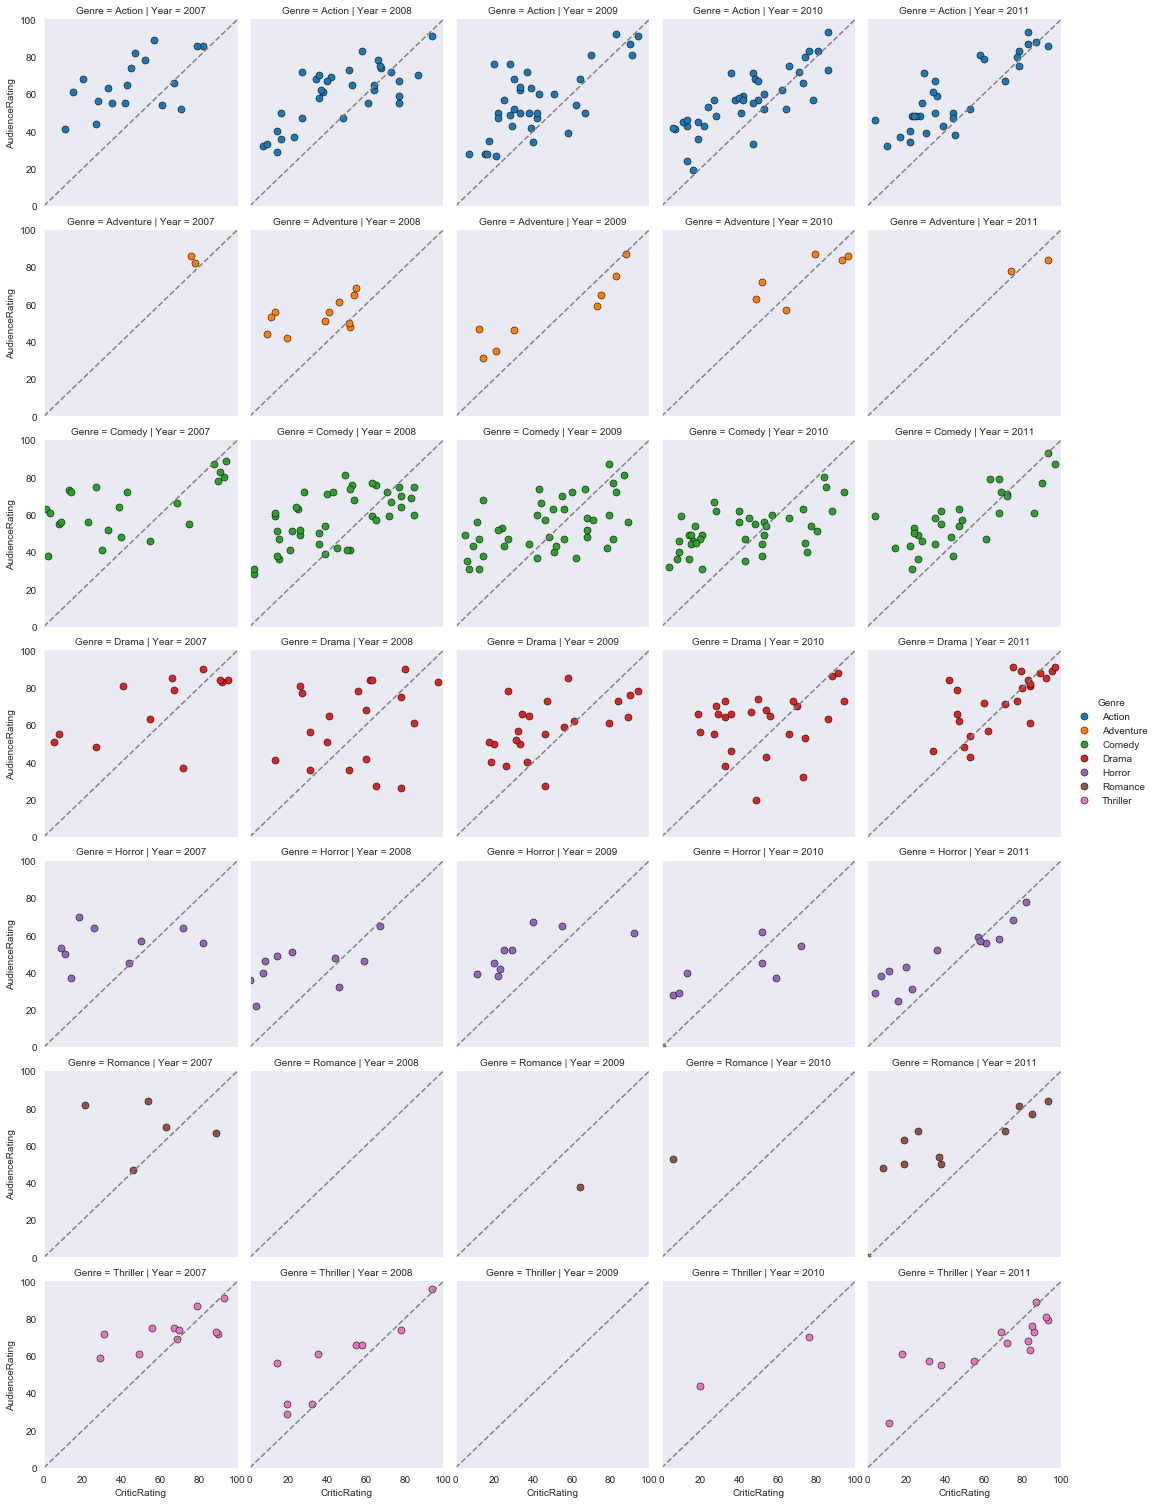

In [140]:
#Controlling Axis and Adding Diagonals
g = sns.FacetGrid(movies, row='Genre', col='Year', hue='Genre')
kws = dict(s=50, linewidth=0.5, edgecolor='black')
g = g.map(plt.scatter, 'CriticRating', 'AudienceRating', **kws)
g.set(xlim=(0,100), ylim=(0,100))

for i in g.axes.flat:
    i.plot((0,100), (0,100), c="gray", ls="--")
g.add_legend()

In [141]:
###59. BONUS: Building Dashboards in Python

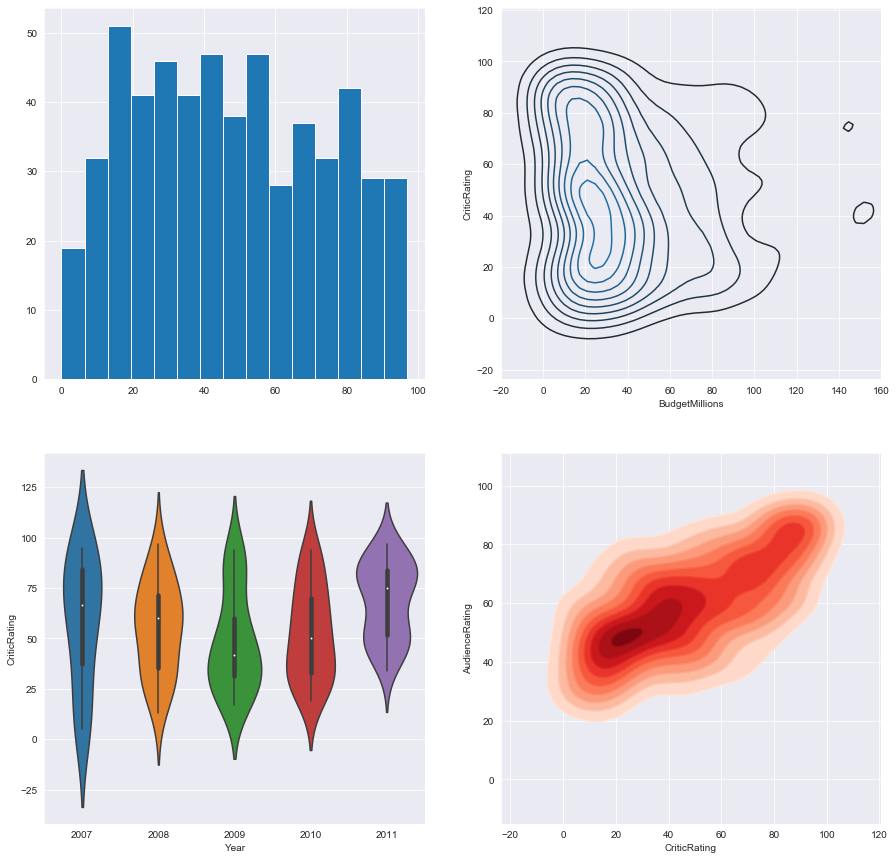

In [146]:
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize=(15,15))

#k1 = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0,0])
axes[0,0].hist(movies.CriticRating, bins=15)

k2 = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0,1])

z = sns.violinplot(data=movies[movies.Genre == 'Drama'], x='Year', y='CriticRating', ax=axes[1,0])

k3a = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Reds', ax=axes[1,1])
k3b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='Reds', ax=axes[1,1])

k1.set(xlim=(-20,160))
k2.set(xlim=(-20,160))
plt.show()

In [ ]:
###60. BONUS: Styling Tips

In [ ]:
#Styling Dashboards

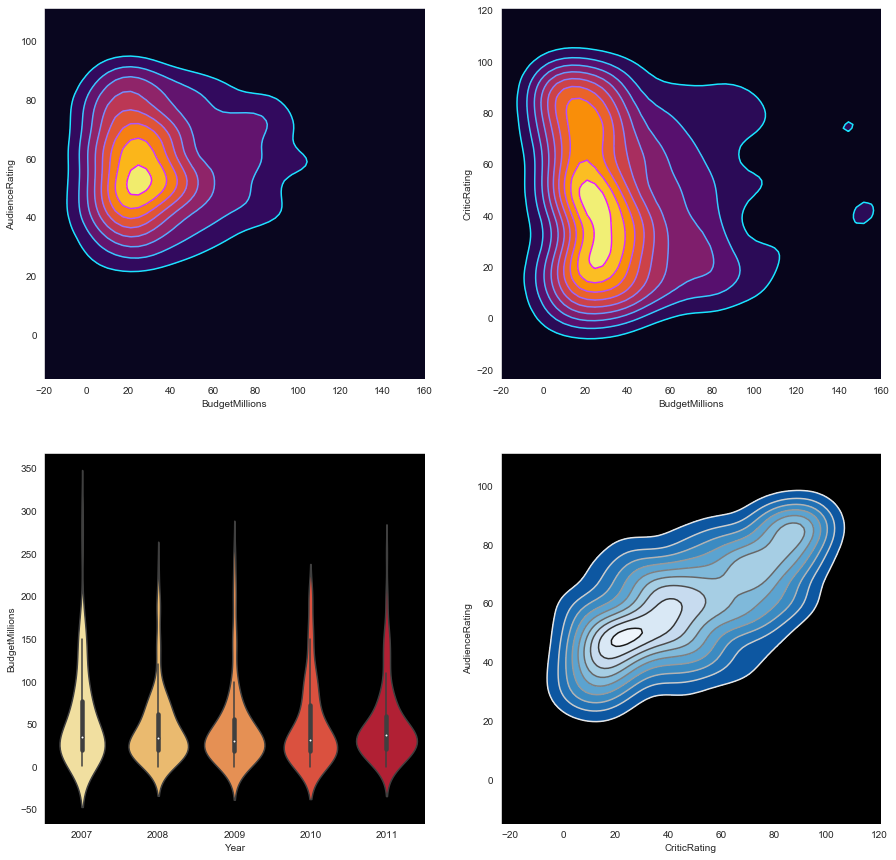

In [158]:
sns.set_style('dark', {"axes.facecolor":"black"})
f, axes = plt.subplots(2,2, figsize=(15,15))
#Plot [0,0]
k1a = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0,0], shade=True, shade_lowest=True, cmap="inferno")
k1b = sns.kdeplot(movies.BudgetMillions, movies.AudienceRating, ax=axes[0,0], cmap="cool")
#axes[0,0].hist(movies.CriticRating, bins=15)

#Plot [0,1]
k2a = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0,1], shade=True, shade_lowest=True, cmap="inferno")
k2b = sns.kdeplot(movies.BudgetMillions, movies.CriticRating, ax=axes[0,1], cmap="cool")

#Plot [1,0]
z = sns.violinplot(data=movies, x='Year', y='BudgetMillions', ax=axes[1,0], palette='YlOrRd')

#Plot [1,1]
k3a = sns.kdeplot(movies.CriticRating, movies.AudienceRating, shade=True, shade_lowest=False, cmap='Blues_r', ax=axes[1,1])
k3b = sns.kdeplot(movies.CriticRating, movies.AudienceRating, cmap='gist_gray_r', ax=axes[1,1])

k1a.set(xlim=(-20,160))
k2a.set(xlim=(-20,160))
plt.show()

In [ ]:
###61. BONUS: Finishing Touches

In [161]:
#Thematic edits

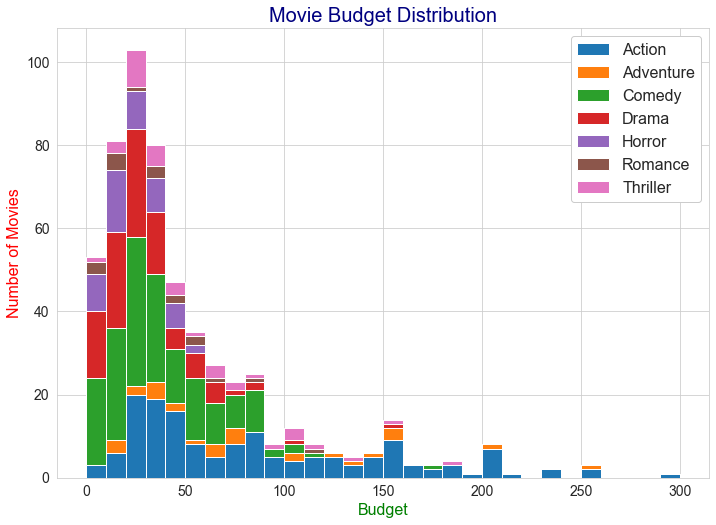

In [189]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27) #size of A4 paper
h = plt.hist(movie_budget_per_genre, bins=30, stacked=True, label=mylabels)
plt.title("Movie Budget Distribution", fontsize=20, color='Navy', fontname="Arial")
plt.ylabel("Number of Movies", fontsize=16, color="Red")
plt.xlabel("Budget", fontsize=16, color="Green")
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.legend(prop={"size":16}, fancybox=True, framealpha=1)
plt.show()